# TC1002S Herramientas computacionales: el arte de la analítica

# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Pablo Agustín Ortega-Kral

- ID: A00344664

- My carreer: IRS


# Importing libraries

In [1027]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


# PART 1
# Use your assigned dataset

## A1 Load data

In [1028]:
data_src = "datasets/A00344664.csv"
my_data = pd.read_csv(data_src)
# Remover primera columna
my_data.pop(my_data.columns[0])
my_data.head()

,x1,x2
0,-0.611297,1.073203
1,-0.146096,0.419931
2,0.144640,1.033877
3,1.434276,-0.522218
4,-0.646948,0.140574


## A2 Data managment


Print the first 7 rows

In [1029]:
my_data.head(7)

,x1,x2
0,-0.611297,1.073203
1,-0.146096,0.419931
2,0.144640,1.033877
3,1.434276,-0.522218
4,-0.646948,0.140574
5,-0.350596,0.499619
6,0.941844,0.049769


Print the first 4 last rows

In [1030]:
my_data.tail(4)

,x1,x2
1246,-0.068179,0.374351
1247,-0.347037,0.836190
1248,1.768973,-0.033712
1249,0.497420,-0.344560


How many rows and columns are in your data?

Use the `shape` method


In [1031]:
rows = my_data.shape[0]
print("Rows", rows)

Rows 1250


Print the name of all columns 

Use the `columns` method

In [1032]:
colums = my_data.columns
colums

Index(['x1', 'x2'], dtype='object')

What is the data type in each column

Use the `dtypes` method 

In [1033]:
my_data.dtypes

x1    float64
x2    float64
dtype: object

What is the meaning of rows and columns?

1) Rows are the numbers of observations we have, that is to say, the number of data.

2) Columns on the other hand are the number of attributes we are observing.


Print a statistical summary of your columns


In [1034]:
my_data.describe()

,x1,x2
count,1250.000000,1250.000000
mean,0.498906,0.246001
std,0.883871,0.529255
min,-1.373821,-1.039977
25%,-0.111367,-0.186262
50%,0.504506,0.239975
75%,1.088963,0.675886
max,2.472962,1.430291


1) What is the minumum and maximum values of each variable
- Min x1: -1.373821	
- Max x1: 2.472962

- Min x2: -1.039977
- Max x2: 1.430291

2) What is the mean and standar deviation of each variable

- Mean x1: 0.498906	
- Mean x2: 0.246001

- std x1: 0.883871	
- std x2: 0.529255

3) What the 25%, 50% and 75% represent?
They are the percentiles of the dataframe. The indicate what values lie in what percentage of the dataset. The 50% percentile indicates the median.



Rename the columns using the same name with capital letters

In [1035]:
my_data = my_data.rename(columns={'x1':'X1','x2':'X2'})
my_data.head()

,X1,X2
0,-0.611297,1.073203
1,-0.146096,0.419931
2,0.144640,1.033877
3,1.434276,-0.522218
4,-0.646948,0.140574


Rename the columns to their original names

In [1036]:
my_data = my_data.rename(columns={'X1':'x1','X2':'x2'})
my_data.head()

,x1,x2
0,-0.611297,1.073203
1,-0.146096,0.419931
2,0.144640,1.033877
3,1.434276,-0.522218
4,-0.646948,0.140574


Use two different alternatives to get one of the columns

In [1037]:
column_x1 = my_data["x1"]
column_x1 


0      -0.611297
1      -0.146096
2       0.144640
3       1.434276
4      -0.646948
          ...   
1245    0.932806
1246   -0.068179
1247   -0.347037
1248    1.768973
1249    0.497420
Name: x1, Length: 1250, dtype: float64

In [1038]:
column_x2 = my_data.iloc[:,1]
column_x2

0       1.073203
1       0.419931
2       1.033877
3      -0.522218
4       0.140574
          ...   
1245   -0.752738
1246    0.374351
1247    0.836190
1248   -0.033712
1249   -0.344560
Name: x2, Length: 1250, dtype: float64

Get a slice of your data set: first and second columns and rows from 62 to 72

In [1039]:
slice = my_data.loc[62:72,:]
slice

,x1,x2
62,0.244037,-0.072881
63,0.524598,0.970608
64,-0.671418,0.420156
65,-0.093338,0.323289
66,0.490161,-0.365652
67,-0.884711,0.551204
68,2.267223,0.042774
69,0.499086,0.915997
70,1.144580,0.179263
71,-0.525120,0.475992


For the first and second columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [1040]:
my_data.notnull().sum()

x1    1250
x2    1250
dtype: int64

In [1041]:
pd.isnull(my_data).sum()

x1    0
x2    0
dtype: int64

### Questions 

Based on the previos results, provide a description of yout dataset

The provided dataset contained two values x1 and x2. There are a total of 1250 observations for each attribute ans the data set contains no null values.

The values for x1 range from -1.373821 to 2.472962 with a standar deviation of 0.883871. On the other hand, the values for x2 range from -1.039977 to 1.430291 with a standar deviation of 0.529255. 




## A3 Data visualization

Plot in the same figure the histogram of the two variables

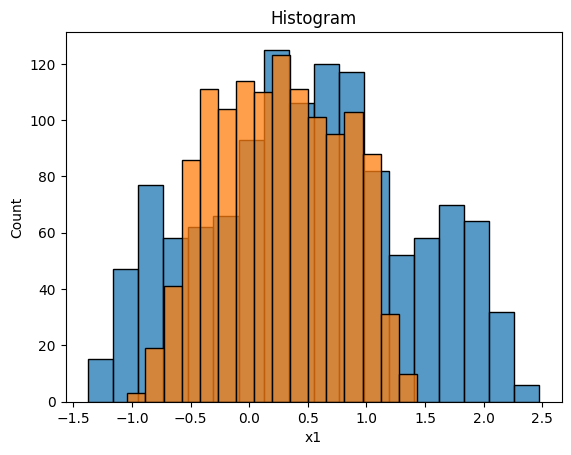

In [1042]:
sns.histplot(my_data["x1"], kde=False)
sns.histplot(my_data["x2"], kde=False)
plt.title("Histogram")
plt.show()

Based on this plots, provide a description of your data:

Your response here:

Plot in the same figure the boxplot of the two variables 

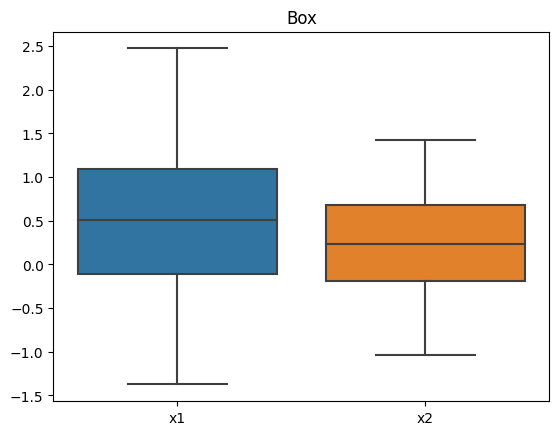

In [1043]:
sanitized = my_data.loc[:,["x1","x2"]]
sns.boxplot(data=sanitized,orient="v")
plt.title("Box")
plt.show()

Scatter plot of the two variables

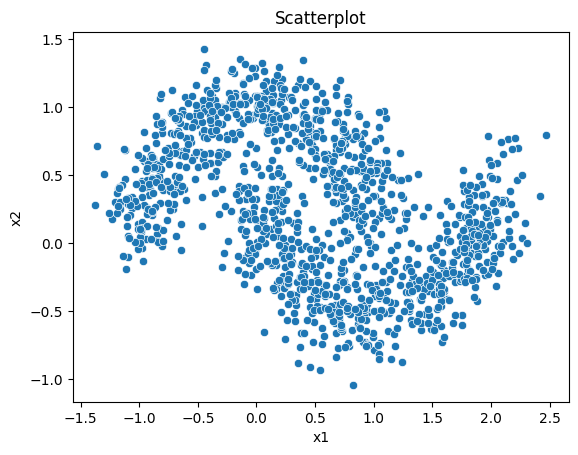

In [1044]:
sns.scatterplot(data=my_data,x='x1',y='x2')
plt.title("Scatterplot")
plt.show()

### Questions 

Based on the previos plots, provide a description of yout dataset

Your response:




## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [1045]:
clusters_number = 2
# Initilialize kmeans object
k_means = KMeans(n_clusters=clusters_number,
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=0)
y_kmeans = k_means.fit_predict(my_data)

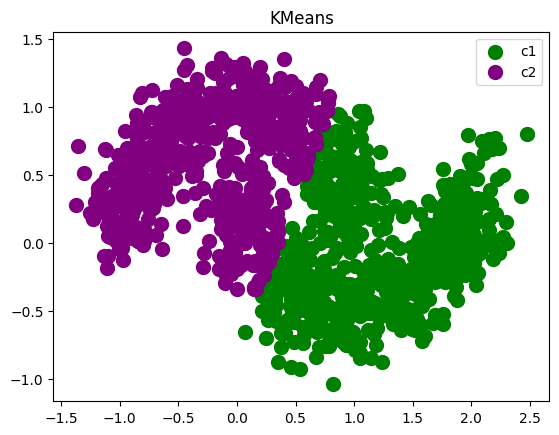

In [1046]:
plt.scatter(my_data.loc[y_kmeans == 0, "x1"],
            my_data.loc[y_kmeans == 0, "x2"],
            s=100, c='green',
            label='c1')
plt.scatter(my_data.loc[y_kmeans == 1, "x1"],
            my_data.loc[y_kmeans == 1, "x2"],
            s=100, c='purple',
            label='c2')
  
plt.title("KMeans")
plt.legend()

Add to your dataset a column with the assihned cluster to each data point

In [1047]:
my_data["Cluster"] = y_kmeans
my_data.head()

,x1,x2,Cluster
0,-0.611297,1.073203,1
1,-0.146096,0.419931,1
2,0.144640,1.033877,1
3,1.434276,-0.522218,0
4,-0.646948,0.140574,1


Print the number associated to each cluster

In [1048]:
y_kmeans

array([1, 1, 1, ..., 1, 0, 0], dtype=int32)

Print the centroids

In [1049]:
print("Centroids \n")
k_means.cluster_centers_

Centroids 



array([[ 1.17992164, -0.06756634],
       [-0.23886017,  0.58569928]])

Print the intertia metric

In [1050]:
print("Inertial metric \n")
k_means.inertia_

Inertial metric 



564.4223104088557

Plot a scatter plot of your data assigned to each cluster. Also plot the centroids

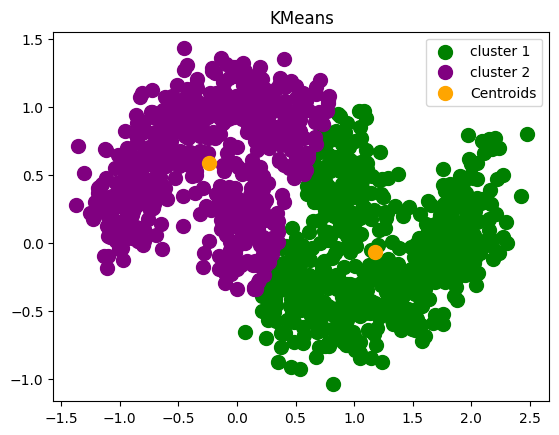

In [1051]:
plt.scatter(my_data.loc[y_kmeans == 0, "x1"],
            my_data.loc[y_kmeans == 0, "x2"],
            s=100, c='green',
            label='cluster 1')
plt.scatter(my_data.loc[y_kmeans == 1, "x1"],
            my_data.loc[y_kmeans == 1, "x2"],
            s=100, c='purple',
            label='cluster 2')
plt.scatter(k_means.cluster_centers_[:, 0],
            k_means.cluster_centers_[:, 1],
            s=100, c='orange',
            label='Centroids')
  
plt.title("KMeans")
plt.legend()

### Questions 

Provides a detailed description of your results

We can see that even though KMeans creates two clusters based on the proximity of the points, it fails to be indicative of the actual data set as the points are organized in a spiral and thus requiere other clustering techniques.

## A5 Elbow plot

Compute the Elbow plot

In [1052]:
distortions = []
K = range(1,18)
print(K)

range(1, 18)


In [1053]:
X = my_data[["x1","x2"]]
for k in K: 
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeans_model.cluster_centers_,"euclidean"),axis=1))/X.shape[0])


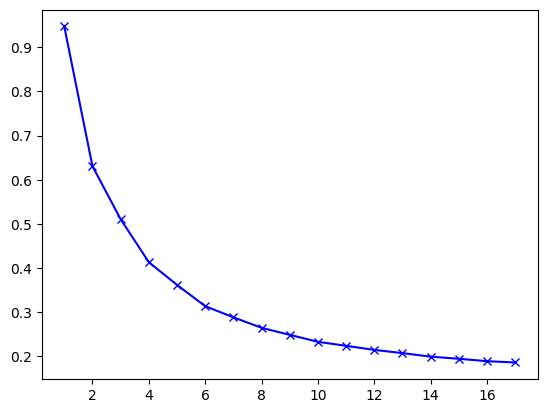

In [1054]:
plt.plot(K,distortions,'bx-')

### Questions 

**What is the best number of clusters K? (argue your response)**

We can see that according to the elbow tecnique the ideal number of clusters is 2 or 4. However there is a broader discussion to be made about the effectiveness of KMeans for the dataset. Since the data provided contains spirals, KMeans does not accurately group as it does not account for the curves in the data set, in this way the KMeans algorithm simply is grouping the points by their distance, ignoring the underlying curve they follow.

In this sense, the number of clusters will not improve this fact.

**Does this number of clusters agree with your inital guess? (argue your response)**

It is in some way similar to the visual inspection of the data but for different reasons. In the visual inspection we decide on two clusters as we see two spirals. The *elbow tecnique* indicates two clusters as the points that are nearest in the right and left.



# PART 2
# Create a dataset and do clustering

1) Generate some data using the "make_blobs" function from "sklearn.datasets"

- The number of observations is equal to the three last digits in your ID (if this number is lower than 99, then multiply it by ten)

- 3 variables

- 4 clusters

- Standar deviation of each cluster of 1.5



In [1055]:
from sklearn.datasets import make_blobs
generated_data = make_blobs(n_samples=664,n_features=3,centers=4,cluster_std=1.5)
generated_data_df = pd.DataFrame(data=generated_data[0],columns=["x1","x2","x3"])
generated_data_df.head()

,x1,x2,x3
0,2.110244,12.458403,7.929332
1,0.584021,7.700162,8.019847
2,-0.032011,-1.346017,8.213789
3,6.435440,2.003098,-6.515995
4,3.786276,-2.134285,1.644169


2) Plot the scatter plot of your data using the real cluster labels

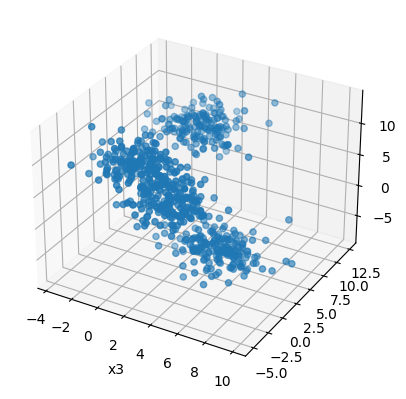

In [1056]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x_1 = generated_data_df['x1']
x_2 = generated_data_df['x2']
x_3 = generated_data_df['x3']

ax.set_xlabel("x1")
ax.set_xlabel("x2")
ax.set_xlabel("x3")

ax.scatter(x_1, x_2, x_3)

3) Do K means clustering 

In [1057]:
clusters_number = 4
# Initilialize kmeans object
k_means = KMeans(n_clusters=clusters_number,
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=0)
y_kmeans = k_means.fit_predict(generated_data_df)

In [1058]:
k_means.cluster_centers_

array([[ 2.67806619, -0.04902857,  3.47762498],
       [ 1.25411741,  8.03360297,  8.49322058],
       [ 5.31307034,  2.09727836, -4.14698145],
       [ 0.78023851, -0.99914649,  9.07133924]])

4) Plot the scatter plot of your data using the estimated cluster labels

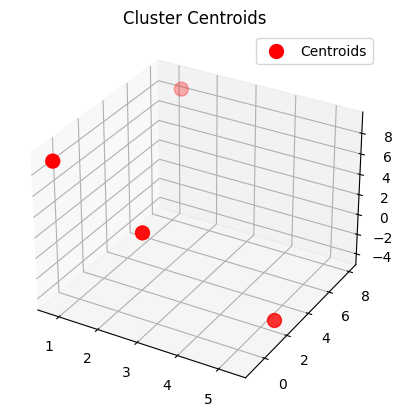

In [1059]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(k_means.cluster_centers_[:, 0],
            k_means.cluster_centers_[:, 1],
            k_means.cluster_centers_[:, 2],
            s=100, c='red',
            label='Centroids')
plt.title("Cluster Centroids")
plt.legend()

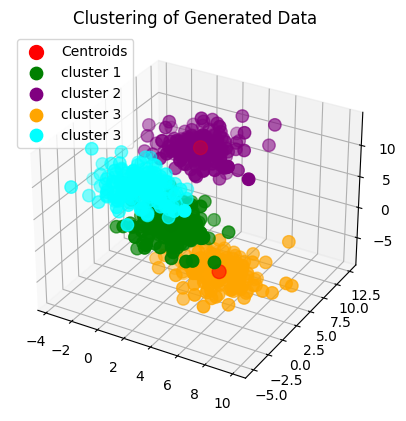

In [1060]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(k_means.cluster_centers_[:, 0],
            k_means.cluster_centers_[:, 1],
            k_means.cluster_centers_[:, 2],
            s=100, c='red',
            label='Centroids')
  
ax.scatter(generated_data_df.loc[y_kmeans == 0, "x1"],
            generated_data_df.loc[y_kmeans == 0, "x2"],
            generated_data_df.loc[y_kmeans == 0, "x3"],
            s=80, c='green',
            label='cluster 1')
ax.scatter(generated_data_df.loc[y_kmeans == 1, "x1"],
            generated_data_df.loc[y_kmeans == 1, "x2"],
            generated_data_df.loc[y_kmeans == 1, "x3"],
            s=80, c='purple',
            label='cluster 2')
ax.scatter(generated_data_df.loc[y_kmeans == 2, "x1"],
            generated_data_df.loc[y_kmeans == 2, "x2"],
            generated_data_df.loc[y_kmeans == 2, "x3"],
            s=80, c='orange',
            label='cluster 3')
ax.scatter(generated_data_df.loc[y_kmeans == 3, "x1"],
            generated_data_df.loc[y_kmeans == 3, "x2"],
            generated_data_df.loc[y_kmeans == 3, "x3"],
            s=80, c='cyan',
            label='cluster 3')
plt.title("Clustering of Generated Data")
plt.legend()

### Questions 

Provides a detailed description of your results.

In this activity we works towards the solution knowing what to expect. Giving that we generated the dataset purposely to have 4 tighly grouped clusters we exepect to see as such in the clustering. When visualizing the scatterplot of the datset we can clearly identify the 4 groups, this is confirmed when applying clustering.


# PART 3
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia 

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:

This week served as a primer on modeling complex datasets using Pandas. Through the activities developed I was able to practiced the modelling of different systems using visualization tools such as histograms, scatterplots, box plots, among others; practice the sanitization and pre-processing of data to remove unwanted values that could introduce unwanted values; and practice the anlysis of the data to develop predictive tools that can extrapolate the patterns found. In this sense, I was able to explore the complete pipeline of data modelling.